<a href="https://colab.research.google.com/github/tatayttttt/My-projects-/blob/main/04-regularization/Regularization_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import Ridge, Lasso

# Task 1 (3 points + 2 points for a well organized and easy to read plot + 1 point for the short comment)

Consider the following toy dataset with pairs of correlated features:

In [39]:
def gen_data(N, correlation=0.5):
  # start from 4 independent features:
  X = np.random.uniform(-1., 1., size=(N, 4))

  y = X @ [2.3, -4.7, -1.7, 3.2] # true dependence

  # add correlations, so that X[:,0] correlates with X[:,2] and
  # X[:,1] correlates with X[:,3]:
  X[:,2:] = correlation * X[:,:2] + (1 - correlation) * X[:,2:]

  # add some noise to the targets
  y += np.random.normal(size=y.shape)

  return X, y

In [40]:
N = 1000
data = gen_data(N)
X = data[0]
y = data[1]


In [61]:
#X_frame = pd.DataFrame(data[0])

,0,1,2,3
0,0.404302,-0.947459,0.355745,-0.487722
1,-0.594685,0.519413,0.158037,-0.077025
2,-0.208452,0.474473,0.357071,0.078652
3,-0.897781,0.305110,-0.785597,0.496289
4,-0.999558,-0.514509,-0.825476,-0.589318
...,...,...,...,...
995,-0.550541,0.663846,-0.250978,0.292387
996,0.548972,-0.386801,0.516500,-0.226997
997,0.435637,0.895435,0.213715,0.554917
998,-0.647086,-0.172352,-0.737735,-0.389489


In [41]:
# downloading the required packages
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [69]:
# dividing data on train and test samples 
from sklearn.model_selection import train_test_split # downloading the required package
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=200, random_state=39)

# Inserting data into Frame 
X_train_frame = pd.DataFrame(X_train)
X_test_frame = pd.DataFrame(X_test)

In [44]:
# Ridge
model = make_pipeline(
    PolynomialFeatures(9, include_bias=False),
    Ridge(alpha=1.)
)

model.fit(X_train, y_train)

print('train mse = ', mean_squared_error(y_train, model.predict(X_train)))
print('test mse = ', mean_squared_error(y_test, model.predict(X_test)))

train mse =  0.8915400356513865
test mse =  0.9151549276073144


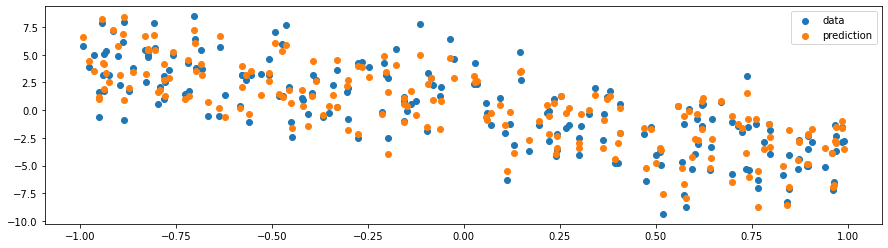

In [70]:
plt.figure(figsize=(15, 4))
plt.scatter(X_test_frame[1], y_test, label='data')
plt.scatter(X_test_frame[1], model.predict(X_test), label='prediction')
plt.legend()

In [71]:
#Ridge and Lasso (without the bias term!), for different correlation levels and various regularization powers.

In [72]:
from tqdm import tqdm

In [74]:
reg_powers = np.logspace(-12, 5, 18 * 5, base=10)


train_mse = []
test_mse = []

params = []

for alpha in tqdm(reg_powers):
  linear_model = Ridge(alpha=alpha)
  model = make_pipeline(
    PolynomialFeatures(9, include_bias=False),
    linear_model
  )
  model.fit(X_train, y_train)

  params.append(
      np.append(linear_model.coef_,
                linear_model.intercept_)
  )

  train_mse.append(mean_squared_error(y_train, model.predict(X_train)))
  test_mse.append(mean_squared_error(y_test, model.predict(X_test)))

params = np.array(params)


100%|██████████| 90/90 [00:13<00:00,  6.47it/s]


In [78]:
reg_powers

array([1.00000000e-12, 1.55242717e-12, 2.41003013e-12, 3.74139626e-12,
       5.80824522e-12, 9.01687771e-12, 1.39980460e-11, 2.17309470e-11,
       3.37357126e-11, 5.23722369e-11, 8.13040837e-11, 1.26218669e-10,
       1.95945291e-10, 3.04190795e-10, 4.72234056e-10, 7.33108980e-10,
       1.13809830e-09, 1.76681473e-09, 2.74285120e-09, 4.25807673e-09,
       6.61035402e-09, 1.02620932e-08, 1.59311524e-08, 2.47319538e-08,
       3.83945572e-08, 5.96047539e-08, 9.25320396e-08, 1.43649253e-07,
       2.23005003e-07, 3.46199027e-07, 5.37448777e-07, 8.34350085e-07,
       1.29526774e-06, 2.01080884e-06, 3.12163429e-06, 4.84610990e-06,
       7.52323269e-06, 1.16792709e-05, 1.81312174e-05, 2.81473946e-05,
       4.36967803e-05, 6.78360691e-05, 1.05310557e-04, 1.63486970e-04,
       2.53801615e-04, 3.94008524e-04, 6.11669540e-04, 9.49572415e-04,
       1.47414202e-03, 2.28849813e-03, 3.55272668e-03, 5.51534944e-03,
       8.56217834e-03, 1.32921583e-02, 2.06351078e-02, 3.20345020e-02,
      

Fit this dataset with Ridge and Lasso (**without the bias term!**), for different correlation levels and various regularization powers.

Separately for Ridge and Lasso, and separately for different correlation levels, plot the fitted parameter values as a function of regularization power (x-axis in log scale). Make sure to make some color and pattern coding to make it clear which parameters correspond to correlating groups of features, e.g.:
```python
# Same color (red), different patterns (solid vs dashed) for features 0 and 2
plt.plot(alpha_values, param_0, color='red', label='0')
plt.plot(alpha_values, param_2, '--', color='red', label='2')

# Same color (blue), different patterns (solid vs dashed) for features 1 and 3
plt.plot(alpha_values, param_1, color='blue', label='1')
plt.plot(alpha_values, param_3, '--', color='blue', label='3')
```
Please also add legends, axis labels and/or titles to be able to understand what's shown on this or that plot.

What do you observe? How regularization affects the two kinds of models for different correlation levels? Write a short comment.

In [ ]:
from tqdm import tqdm

for correlation in [0.1, 0.5, 0.9]:
  # dataset to fit (no need to split into train/test in this task):
  X, y = gen_data(500, correlation)

  # regularization powers:
  alpha_values = np.logspace(-4, 4, 100, base=10)

  # lists to collect models' parameters:
  params_ridge = []
  params_lasso = []

  for alpha in tqdm(alpha_values):
    <YOUR CODE>